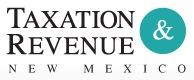![alphie 1.01.png align="right"](attachment:6395d056-2ebd-4209-a3cb-2e506c93246d.png )
**<h1><p style="text-align: center;">Alphie 2.07</p>**


<h11><p style="text-align: right;">
Written & maintained by:<br>
Asif Rasool<br><br>
Senior Economist<br>
Tax Analysis, Research & Statistics<br>
Office of the Secretary<br>
New Mexico Taxation & Revenue Department<br>
Phone: 505 490 0904<br>
Email: asif.rasool@tax.nm.gov<br>
Last updated on 12-12-2023</p>

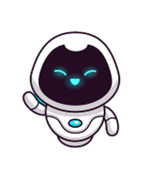

# Installing and loading required packages

In [1]:
######################################
######### Python libraries ###########

# !pip install selenium
# !pip install webdriver_manager
# !pip install pypiwin32
# !pip install --upgrade holidays
# !pip install tabula-py
# !pip install jupyter_ai
# !pip install openpyxl

import tabula
import getpass
import time
import os 
import datetime
import win32com.client as win32
import holidays
import glob
import datetime as dt
import json
import shutil
import pandas as pd

from datetime import datetime, timedelta
from win32com.client import Dispatch
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from win32com.shell import shell, shellcon
from win32com.client import Dispatch
from IPython import get_ipython
from IPython.display import Image

######################################

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--incognito")

appState = {
     "recentDestinations": [
         {
             "id": "Save as PDF",
             "origin": "local",
             "account": ""
         }
     ],
     "selectedDestinationId": "Save as PDF",
     "version": 2
}

profile = {
    'printing.print_preview_sticky_settings.appState': json.dumps(appState),
    'savefile.default_directory': '//trdecomsrv/H/Alphie/Temp',
    "download.default_directory": r'\\trdecomsrv\H\Alphie\Temp'
}

chrome_options = webdriver.ChromeOptions() 
chrome_options.add_experimental_option('prefs', profile)
chrome_options.add_argument('--kiosk-printing')

browser = webdriver.Chrome(options=chrome_options)
browser.maximize_window()
browser.switch_to.window(browser.window_handles[0])
browser.delete_all_cookies()

######################################
########### R libraries ##############

# !pip install rpy2 --quiet

os.environ['R_HOME'] = r'C:\Program Files\R\R-4.3.2'
r_home = os.environ.get("R_HOME")
print('R_HOME:', r_home)

import rpy2
import rpy2.robjects as ro
import rpy2.rinterface as ri
from rpy2.robjects import r

from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.vectors import IntVector, FloatVector
import rpy2.ipython.html
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png
import rpy2.rinterface as rinterface

pandas2ri.activate()
%load_ext rpy2.ipython

######################################


R_HOME: C:\Program Files\R\R-4.3.2


C:\Users\asifr\AppData\Local\anaconda3\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(
C:\Users\asifr\AppData\Local\anaconda3\Lib\site-packages\rpy2\robjects\lib\ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.4
  warnings.warn(


## Loading R packages

In [2]:
%%R
# install.packages("readODS")
library(readODS)
library(readxl)
library(writexl)
library(openxlsx)
library(readxl)
library(readODS)
library(lubridate)
library(ggplot2)
library(dplyr)
library(plotly)
library(hrbrthemes)


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

Registering Windows fonts with R


# Creating output folder

In [3]:
today = datetime.now()

os.mkdir("//Trdecomsrv/H/Alphie/" + today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())
folder_path = "//Trdecomsrv/H/Alphie/"
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
destination_folder = (files[0])

# Providing login credentials

In [4]:
my_login = getpass.getpass("Please type your GenTax login id:\n")

Please type your GenTax login id:
 ········


In [5]:
my_password = getpass.getpass("Please type your GenTax password:\n")

Please type your GenTax password:
 ········


In [6]:
url = 'https://gentaxprod.trd.state.nm.us/GenTax/dPWmgh2N/#1'
browser.get(url)
browser.maximize_window()

In [7]:
time.sleep(2)
username_el = browser.find_element("name", "Dc-c")
username_el.send_keys(my_login)

In [8]:
password_el = browser.find_element("name", "Dc-d")
password_el.send_keys(my_password)

# Clicking the logon button

In [9]:
time.sleep(1.5)
submit_btn_el = browser.find_element("css selector", "[class='ButtonCaptionText']")

In [10]:
submit_btn_el.click()

# Clicking the Report button

In [11]:
time.sleep(1.5)
Report_btn_el = browser.find_element("id", "l_Dd-1-16")
Report_btn_el.click()

# Clicking the Generate Report button

In [12]:
time.sleep(1.5)
Generate_Report_btn_el = browser.find_element("id", "l_Dc-1-4")
Generate_Report_btn_el.click()

# Searching CFT Special Fuels - Agr Dept

In [13]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)
input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("CFT Special Fuels - Agr Dept")
input_field_el.send_keys(Keys.ENTER) 

## Clicking thr Generate Report button

In [14]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-135")
Generate_btn_el.click()

## Defining the FilingPeriodForm

In [15]:

# Get the current date
current_date = dt.date.today()

# Get the current quarter
current_quarter = (current_date.month - 1) // 3 + 1

# Calculate the start month of the current quarter
start_month = (current_quarter - 1) * 3 + 1

# Calculate the first day of the current quarter
first_day_of_quarter = dt.date(current_date.year, start_month, 1)
tenth_day_of_quarter = dt.date(current_date.year, start_month, 10)
# Print the first day of the current quarter
print("Tenth day of the current quarter:", tenth_day_of_quarter)

Tenth day of the current quarter: 2023-10-10


In [16]:
ONE_DAY = dt.timedelta(days=1)

HOLIDAYS_US = holidays.US()

def next_business_day():
    next_day = tenth_day_of_quarter + ONE_DAY
    while next_day.weekday() in holidays.WEEKEND or next_day in HOLIDAYS_US:
        next_day += ONE_DAY
    return next_day;

FiliningPeriodForm = next_business_day()
FiliningPeriodForm = FiliningPeriodForm.strftime("%d-%b-%Y")
print(FiliningPeriodForm)

11-Oct-2023


## Defining the FilingPeriodTo

In [17]:
current_date = dt.date.today()

FiliningPeriodTo = current_date.strftime("%d-%b-%Y")
FiliningPeriodTo

'14-Dec-2023'

## Inputing the dates

In [18]:
time.sleep(1)
FiliningPeriodForm_el = browser.find_element("id", "Dg-2")
FiliningPeriodForm_el.send_keys(FiliningPeriodForm)
FiliningPeriodForm_el.send_keys(Keys.ENTER)

In [19]:
time.sleep(1)
FiliningPeriodTo_el = browser.find_element("id", "Dg-3")
FiliningPeriodTo_el.send_keys(FiliningPeriodTo)
FiliningPeriodTo_el.send_keys(Keys.ENTER)

## Clicking Generate button

In [20]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [21]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Renaming and moving the report

In [22]:
# Get the current date
current_date = dt.date.today()

# Calculate the current quarter
current_quarter = (current_date.month - 1) // 3 + 1

# Print the current quarter
print("Current quarter:", current_quarter)

Current quarter: 4


In [23]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [24]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])
file_name

'fYX1Cug5m1N6_5qo2Vk3uw__'

In [25]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, current_date.strftime("%Y") + " " + "Q" + str(current_quarter) + ".pdf")
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [26]:
biodiesel_email_item_1 = new_file

## Closing the report

In [27]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: CFT Special Fuels - Agr Dept' in button.get_attribute('title'):
        button.click();

# Searching CFT Biodiesel Monthly -Agr Dpt

In [28]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(3)
input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("CFT Biodiesel Monthly -Agr Dpt")
input_field_el.send_keys(Keys.ENTER)  

## Clicking thr Generate Report button

In [29]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-11")
Generate_btn_el.click()

## Defining filing period for this report

In [30]:
# Get the current date
current_date = dt.datetime.now()

# Calculate the month before the current month
last_month = current_date.month - 2

# If the current month is January, set last_month to December of the previous year
if last_month == 0:
    last_month = 12

# Calculate the year of the last month
last_month_year = current_date.year
if last_month == 12:
    last_month_year -= 1

# Get the last day of the last month
last_day_of_last_month = dt.date(last_month_year, last_month + 1, 1) - dt.timedelta(days=1)

# Print the last day of the last month
# print("The last day of the month before last month is:", last_day_of_last_month)

filing_period = last_day_of_last_month.strftime("%d-%b-%Y") 
filing_period

'31-Oct-2023'

## Inputing filing period

In [31]:
time.sleep(1)
FilingPeriod_el = browser.find_element("id", "Dg-2")
FilingPeriod_el.send_keys(filing_period)
FilingPeriod_el.send_keys(Keys.ENTER)

## Clicking Generate button

In [32]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [33]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Renaming and moving the report

In [34]:
today = dt.date.today()
first = today.replace(day=1)
accrue_month_1 = first - dt.timedelta(days=25)
accrue_month_2 = first - dt.timedelta(days=32)
print(accrue_month_1.strftime("%Y-%b"))
print(accrue_month_2.strftime("%Y-%b"))

2023-Nov
2023-Oct


In [35]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [36]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])
file_name

'1IgmkKHUrig9DAVi9a_fAw__'

In [37]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_2.strftime("%Y %m.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [38]:
biodiesel_email_item_2 = new_file

## Closing the report

In [39]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: CFT Biodiesel Monthly -Agr Dpt' in button.get_attribute('title'):
        button.click();

# Searching Fuel reports

In [40]:
time.sleep(3)
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)
input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("Fuels report")
input_field_el.send_keys(Keys.ENTER)    

## Fuels Report (Ethanol Section)

### Clicking thr Generate Report button

In [41]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-73")
Generate_btn_el.click()

### Defining Begining_RA

In [42]:
now = dt.datetime.now()

begining_month_closing_day = 10
begining_month = now.month -1
year = now.year
begining_month_closing = dt.datetime (year, begining_month, begining_month_closing_day)
print(begining_month_closing)

ONE_DAY = dt.timedelta(days=1)

TWO_DAY = dt.timedelta(days=2)
HOLIDAYS_US = holidays.US()

def next_business_day():
    next_day = begining_month_closing + TWO_DAY
    while next_day.weekday() in holidays.WEEKEND or next_day in HOLIDAYS_US:
        next_day += TWO_DAY
    return next_day;

Begin_RA = next_business_day()
Begin_RA = Begin_RA.strftime("%d-%b-%Y")
print(Begin_RA)

2023-11-10 00:00:00
14-Nov-2023


### Defining End_RA

In [43]:
ending_month_closing_day = 10
ending_month = now.month 

ending_month_closing = dt.datetime (year, ending_month, ending_month_closing_day)
print(ending_month_closing)

def next_business_day():
    next_day = ending_month_closing + ONE_DAY
    while next_day.weekday() in holidays.WEEKEND or next_day in HOLIDAYS_US:
        next_day += ONE_DAY
    return next_day;

End_RA = next_business_day()
End_RA = End_RA.strftime("%d-%b-%Y")
print(End_RA)

2023-12-10 00:00:00
11-Dec-2023


### Inputing dates

In [44]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [45]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [46]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


### Clicking Export to excel button

In [47]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
    time.sleep(1.5)
except TimeoutException:
    print ("Loading took too much time!")
    
time.sleep(1.5)
Export_to_excel_el = browser.find_element("id", "ic_Dc-9")
Export_to_excel_el.click()

Page is ready!


In [48]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [49]:
last_file

'\\\\trdecomsrv\\H\\Alphie\\Temp\\1799985152.xls'

In [50]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [51]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("eth" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))

try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

### Creating email attachment

In [52]:
fuel_reprt_email_item_1 = new_file

### Close the report

In [53]:
time.sleep(5)
close_button_el = browser.find_elements(By.XPATH, "//button")

try:
    for button in close_button_el:
        if button.get_attribute('title') and 'Close Manager: Fuels Report (Ethanol Section)' in button.get_attribute('title'):
            button.click();
except ElementNotInteractableException:
    time.sleep(5)
    for button in close_button_el:
        if button.get_attribute('title') and 'Close Manager: Fuels Report (Ethanol Section)' in button.get_attribute('title'):
            button.click();        

## Fuels Report (Gasoline Section)

### Clicking thr Generate Report button

In [54]:
options.add_experimental_option("prefs", {
  "download.default_directory": r'\\trdecomsrv\H\Alphie\Temp'
  })

time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-36")
Generate_btn_el.click()

### Inputing dates

In [55]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [56]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [57]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


### Clicking Export to excel button

In [58]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(1.5)
Export_to_excel_el = browser.find_element("id", "ic_Dc-9")
Export_to_excel_el.click()

Page is ready!


In [59]:
time.sleep(2)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [60]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [61]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("gas" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

### Creating email attachment

In [62]:
fuel_reprt_email_item_2 = new_file

### Close the report

In [63]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: Fuels Report (Gasoline Section)' in button.get_attribute('title'):
        button.click();        

## Fuels Report (Diesel Section)

### Clicking thr Generate Report button

In [64]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-156")
Generate_btn_el.click()

### Inputing dates

In [65]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [66]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [67]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


### Clicking Export to excel button

In [68]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
time.sleep(1.5)
Export_to_excel_el = browser.find_element("id", "ic_Dc-9")
Export_to_excel_el.click()

Page is ready!


In [69]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [70]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [71]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("spf" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);


### Creating email attachment

In [72]:
fuel_reprt_email_item_3 = new_file

### Close the report

In [73]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: Fuels Report (Diesel Section)' in button.get_attribute('title'):
        button.click();        

## Fuels Report _CFT & I

### Clicking thr Generate Report button

In [74]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-99")
Generate_btn_el.click()

### Inputing dates

In [75]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [76]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

### Clicking Generate button

In [77]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


### Clicking Export to excel button

In [78]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
    time.sleep(1.5)
    Export_to_excel_el = browser.find_element("id", "ic_Dc-9")
    Export_to_excel_el.click()
except TimeoutException:
    print ("Loading took too much time!")
    Export_to_excel_el = browser.find_element("id", "Dc-9")
    Export_to_excel_el.click()


Page is ready!


In [79]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [80]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [81]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("pi" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

### Creating email attachment

In [82]:
fuel_reprt_email_item_4 = new_file

### Close the report

In [83]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: Fuels Report _CFT P &amp;  I' in button.get_attribute('title'):
        button.click();        

# Searching Alternative Fuel Volumes reports

In [84]:
time.sleep(5)
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(5)

input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("Alternative Fuel Volumes")
input_field_el.send_keys(Keys.ENTER)    

## Clicking Generate button

In [85]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-52")
Generate_btn_el.click()

## Inputing dates

In [86]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dg-2")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [87]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dg-3")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)

## Clicking Generate button

In [88]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking Export to excel button

In [89]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")

time.sleep(1.5)
Export_to_excel_el = browser.find_element("id", "ic_Dc-9")
Export_to_excel_el.click()

Page is ready!


In [90]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [91]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [92]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("alt" + " " +Begin_RA + " " + "to" + " " + End_RA + ".xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

## Creating email attachment

In [93]:
fuel_reprt_email_item_5 = new_file

## Close the report

In [94]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(2)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Alternative Fuel Volumes' in button.get_attribute('title'):
        button.click();

In [95]:
time.sleep(1.5)
close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Group: Generate Report' in button.get_attribute('title'):
        button.click();

time.sleep(1.5)
Generate_Report_btn_el = browser.find_element("id", "l_Dc-1-4")
Generate_Report_btn_el.click()

# Searching CFT Locations reports

In [96]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(1.5)

input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("CFT Locations")
input_field_el.send_keys(Keys.ENTER)

## Clicking Generate button

In [97]:
time.sleep(3)

try:
  Generate_btn_el = browser.find_element("id", "l_Dc-6-365")
  Generate_btn_el.click()
except NoSuchElementException:
  Generate_btn_el = browser.find_element("id", "l_Dc-6-366")
  Generate_btn_el.click();
        
# Generate_btn_el = browser.find_element("id", "l_Dc-6-365")
# Generate_btn_el.click()

## Defining Begining_RA

In [98]:
now = dt.datetime.now()

begining_month_closing_day = 1
begining_month = now.month -2
year = now.year
begining_month_closing = dt.datetime (year, begining_month, begining_month_closing_day)

Begin_RA = begining_month_closing.strftime("%d-%b-%Y")
print(Begin_RA)

01-Oct-2023


## Defining End_RA

In [99]:
input_dt = dt.datetime.now()
print("The original date is:", input_dt.date())

from datetime import datetime, timedelta

last_month = input_dt.replace(day=28) - timedelta(days=32)
res = last_month - timedelta(days=last_month.day)
End_RA = res.strftime("%d-%b-%Y")
print(End_RA)

The original date is: 2023-12-14
31-Oct-2023


## Inputing dates

In [100]:
time.sleep(1)
Begin_RA_el = browser.find_element("id", "Dk-7")
Begin_RA_el.send_keys(Begin_RA)
Begin_RA_el.send_keys(Keys.ENTER)

In [101]:
time.sleep(1)
End_RA_el = browser.find_element("id", "Dk-8")
End_RA_el.send_keys(End_RA)
End_RA_el.send_keys(Keys.ENTER)
time.sleep(1)

In [102]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")
for button in close_button_el:
    if button.get_attribute('class') and 'FastMessageBoxButtonYes ui-button ui-corner-all ui-widget' in button.get_attribute('class'):
        button.click();

## Clicking Cube button

In [103]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(5)

Cube_btn_el = browser.find_element("id", "cl_Dh-a")
Cube_btn_el.click()

## Clicking radio button

In [104]:
time.sleep(7)

radio_btn_el = browser.find_element("id", "cl_Df-g")
radio_btn_el.click();

## Clicking Spreadsheet button

In [105]:
time.sleep(5)

Spreadsheet_btn_el = browser.find_element("id", "l_Df_1-l-3")
Spreadsheet_btn_el.click()

In [106]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [107]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [108]:
today = dt.date.today()
first = today.replace(day=1)
accrue_month_1 = first - dt.timedelta(days=25)
accrue_month_2 = first - dt.timedelta(days=32)
print(accrue_month_1.strftime("%Y-%b"))
print(accrue_month_2.strftime("%Y-%b"))

time.sleep(3)
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".ods"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder,  accrue_month_2.strftime("Gasoline Gallons by Locations" + " " + "%Y-%m.xls"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

2023-Nov
2023-Oct


## Creating email attachment

In [109]:
fuel_reprt_email_item_6 = new_file

## Close the report

In [110]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(2)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: CFT Locations' in button.get_attribute('title'):
        button.click();

# Working on GL Backend RA - Main report

## Searching GL Backend RA - Main report

In [111]:
browser.switch_to.window(browser.window_handles[0])
time.sleep(3)

input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("GL Backend RA - Main")
input_field_el.send_keys(Keys.ENTER)


## Clicking Generate button

In [112]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

# CIT

## Selecting CIT

In [113]:
time.sleep(1.5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("CIT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [114]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [115]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()
    
time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [116]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();

## Renaming and moving the report

In [117]:
today = dt.date.today()
first = today.replace(day=1)
accrue_month_1 = first - dt.timedelta(days=25)
accrue_month_2 = first - dt.timedelta(days=32)
print(accrue_month_1.strftime("%Y-%b"))
print(accrue_month_2.strftime("%Y-%b"))

2023-Nov
2023-Oct


In [118]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [119]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [120]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("CIT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [121]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [122]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [123]:
cit_email_item_1 = new_file

# OGP-R

## Clicking Generate button

In [124]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting OGP-R

In [125]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("OGP-R")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [126]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()
# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [127]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [128]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [129]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [130]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [131]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("OGP-R-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [132]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [133]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [134]:
ogp_r_email_item_1 = new_file

# PIT

## Clicking Generate button

In [135]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting PIT

In [136]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("PIT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [137]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [138]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [139]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [140]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [141]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [142]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("PIT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [143]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [144]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [145]:
pit_email_item_1 = new_file

# PTW-O

## Clicking Generate button

In [146]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting PTW-O

In [147]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("PTW-O")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [148]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [149]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [150]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [151]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [152]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [153]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("PTW-O-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [154]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [155]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [156]:
ptw_o_email_item_1 = new_file

# PTW-R

## Clicking Generate button

In [157]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting PTW-R

In [158]:
time.sleep(3)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("PTW-R")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [159]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [160]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [161]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [162]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [163]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [164]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("PTW-R-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [165]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [166]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [167]:
ptw_r_email_item_1 = new_file

# WWT

## Clicking Generate button

In [168]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting WWT

In [169]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("WWT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [170]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [171]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [172]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [173]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [174]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [175]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("WWT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [176]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [177]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [178]:
wwt_email_item_1 = new_file

# FID

## Clicking Generate button

In [179]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting FID

In [180]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("FID")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [181]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [182]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [183]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [184]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [185]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [186]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("FID-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [187]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [188]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [189]:
fid_email_item_1 = new_file

# NWT

## Clicking Generate button

In [190]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting NWT

In [191]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("NWT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [192]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")


Next page is loaded!


## Clicking the View Report button

In [193]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [194]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [195]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [196]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [197]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("NWT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [198]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [199]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [200]:
nwt_email_item_1 = new_file

# OGP

## Clicking Generate button

In [201]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting OGP

In [202]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("OGP")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [203]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [204]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [205]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();        

## Renaming and moving the report

In [206]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [207]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [208]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("OGP-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [209]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [210]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [211]:
ogp_email_item_1 = new_file

# OGP-O

## Clicking Generate button

In [212]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting OGP-O

In [213]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("OGP-O")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [214]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [215]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [216]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [217]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [218]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [219]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("OGP-O-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [220]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [221]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [222]:
ogp_o_email_item_1 = new_file

# CAN

## Clicking Generate button

In [223]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting CAN

In [224]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("CAN")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [225]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [226]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [227]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [228]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [229]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [230]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("CAN-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [231]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [232]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [233]:
can_email_item_1 = new_file

# GRT

## Clicking Generate button

In [234]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting GRT

In [235]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("GRT")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [236]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [237]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [238]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [239]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [240]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [241]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("GRT-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [242]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [243]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [244]:
grt_email_item_1 = new_file

# CMP

## Clicking Generate button

In [245]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting CMP

In [246]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("CMP")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [247]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [248]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [249]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [250]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [251]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [252]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("CMP-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [253]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [254]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [255]:
cmp_email_item_1 = new_file

# ISI

## Clicking Generate button

In [256]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting ISI

In [257]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("ISI")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [258]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [259]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [260]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [261]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [262]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [263]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("ISI-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [264]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [265]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [266]:
isi_email_item_1 = new_file

# IPP

## Clicking Generate button

In [267]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting IPP

In [268]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("IPP")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [269]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [270]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [271]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [272]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [273]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [274]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("IPP-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

In [275]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [276]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [277]:
ipp_email_item_1 = new_file

# IPS

## Clicking Generate button

In [278]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting IPS

In [279]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("IPS")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [280]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [281]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()

time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [282]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Manager: GL Backend RA - Main' in button.get_attribute('title'):
        button.click();
        

## Renaming and moving the report

In [283]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [284]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [285]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("IPS-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [286]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [287]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [288]:
ips_email_item_1 = new_file

# IPH

## Clicking Generate button

In [289]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-166")
Generate_btn_el.click()

## Selecting IPH

In [290]:
time.sleep(5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("IPH")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [291]:
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the View Report button

In [292]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")
     
time.sleep(1.5)
View_Report_el = browser.find_element("id", "Dc-8")
View_Report_el.click()

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")
    View_Report_el = browser.find_element("id", "ic_Dc-8")
    View_Report_el.click()
time.sleep(1.5)
browser.switch_to.window(browser.window_handles[1])

browser.execute_script('window.print();')
time.sleep(3)
browser.close()

Page is ready!
Next page is loaded!


## Close the report

In [293]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)

close_button_el = browser.find_elements(By.XPATH, "//button")

for button in close_button_el:
    if button.get_attribute('title') and 'Close Group: Generate Report' in button.get_attribute('title'):
        button.click();        



## Renaming and moving the report

In [294]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [295]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [296]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".pdf"))
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, accrue_month_1.strftime("IPH-Prelim. %b %Y Reporting Generic Distribution Report.pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)


In [297]:
# file name with extension
file_name = os.path.basename(new_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [298]:
old_file = os.path.join(destination_folder, new_file)
new_file = os.path.join(destination_folder, accrue_month_2.strftime(file_name + ' ' + "(%b %Y Accrual).pdf"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating Email attachment

In [299]:
iph_email_item_1 = new_file

In [300]:
# browser.close()

# Generating RP-500 Distribution report

## Clicking the Generate Report button

In [301]:
time.sleep(1.5)
Generate_Report_btn_el = browser.find_element("id", "l_Dc-1-4")
Generate_Report_btn_el.click()

## Searching RP-500 - Distribution - GL

In [302]:
browser.switch_to.window(browser.window_handles[0])
browser.implicitly_wait(1.5)
input_field_el = browser.find_element("id", "Dc-h")
input_field_el.send_keys("RP-500 - Distribution - GL")
input_field_el.send_keys(Keys.ENTER) 

## Clicking thr Generate Report button

In [303]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "l_Dc-6-37")
Generate_btn_el.click()

## Selecting Gross Receipts

In [304]:
time.sleep(1.5)
Revenue_Group_el = browser.find_element("name", "Dg-2")
Revenue_Group_el.send_keys("Gross Receipts")
Revenue_Group_el.send_keys(Keys.ENTER)

## Clicking the Generate button

In [305]:
time.sleep(1.5)
Generate_btn_el = browser.find_element("id", "caption2_Dc-7")
Generate_btn_el.click()

# Set the delay in seconds
delay = 180

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
    time.sleep(30)
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking Export to excel button

In [306]:
delay = 180 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located(("id", 'Dc-9')))
    print ("Page is ready!")
    time.sleep(3)
except TimeoutException:
    print ("Loading took too much time!")
    
Export_to_excel_el = browser.find_element("id", "Dc-9")
Export_to_excel_el.click()


Page is ready!


In [307]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
# print (files[0],files[1])#latest two files

In [308]:
last_file

'\\\\trdecomsrv\\H\\Alphie\\Temp\\696752128.xls'

In [309]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [310]:
today = dt.date.today()
first = today.replace(day=1)
accrue_month_2 = first - dt.timedelta(days=32)

In [311]:
print(accrue_month_2.strftime("%Y%m"))

202310


In [312]:
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".xls"))
df =  pd.read_excel(old_file)
df.to_excel('//trdecomsrv/H/Alphie/Temp/R temp/RP500_distribution_input.xlsx', index=False)

WARNING *** file size (860169) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [313]:
old_file = "//trdecomsrv/H/Alphie/Temp/R temp/RP500_distribution_input.xlsx"
new_file = os.path.join(destination_folder, accrue_month_2.strftime("RP500-" + ("%Y%m") + ".xlsx"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

In [314]:
import pandas as pd

# Read the Excel file
excel_file = new_file
df = pd.read_excel(excel_file)
df
# # Specify the column to delete
column_to_delete = ["Unnamed: 1", "Unnamed: 8", "Unnamed: 9"]  # Replace "ColumnName" with the actual column name

# # Delete the column
df.drop(column_to_delete, axis=1, inplace=True)

# # Save the modified DataFrame to Excel
output_file = new_file
df.to_excel(output_file, index=False)

In [315]:
from openpyxl import load_workbook
excel_file = new_file
workbook = load_workbook(excel_file)

In [316]:
# Define the cells to delete
worksheet = workbook["Sheet1"]
cells_to_delete = ["B1", "C1", "D1", "E1", "F1", "G1", "H1", "I1", "J1", "K1"]  # Example: Cells A1, B2, and C3
# Iterate over the cells and delete their values
for cell_to_delete in cells_to_delete:
    worksheet[cell_to_delete].value = None

In [317]:
# # Define the columns to delete
# columns_to_delete = ["B", "I", "J"]  # Example: Columns B, D, and F

# # Iterate over the columns and delete them
# for column_to_delete in columns_to_delete:
#     column_index = worksheet[column_to_delete + "3"].column
#     worksheet.delete_cols(column_index, amount=1)

In [318]:
# Save the modified Excel file
output_file = new_file
workbook.save(output_file)

In [319]:
shutil.copy2(new_file,'//trdecomsrv/H/CRS Reports/RP-500 database/Unredacted/DistributionByAccrualMonth')

'//trdecomsrv/H/CRS Reports/RP-500 database/Unredacted/DistributionByAccrualMonth\\RP500-202310.xlsx'

## Running the R file to generate monthly tracker

In [320]:
import subprocess
r_script_path = '//trdecomsrv/H/Alphie/Temp/Alphie runs R scripts/RP500 Distributions for Alphie.R'

# Run the R script using subprocess
try:
    result = subprocess.run(['C:/Program Files/R/R-4.3.1/bin/Rscript.exe', r_script_path], capture_output=True, text=True)
except FileNotFoundError:
    result = subprocess.run(['C:/Program Files/R/R-4.3.2/bin/Rscript.exe', r_script_path], capture_output=True, text=True)
# Print the output and error messages, if any 
# print('Output:', result.stdout) 
# print('Error:', result.stderr)

## Creating email attachment

In [321]:
RP500_compensating_email_item_1 = new_file

## Close the report

In [322]:
time.sleep(5)
close_button_el = browser.find_elements(By.XPATH, "//button")

try:
    for button in close_button_el:
        if button.get_attribute('title') and 'Close Manager: RP-500 - Distribution - GL' in button.get_attribute('title'):
            button.click();
except ElementNotInteractableException:
    time.sleep(5)
    for button in close_button_el:
        if button.get_attribute('title') and 'Close Manager: RP-500 - Distribution - GL' in button.get_attribute('title'):
            button.click();        


# Generating Oil & Gas tracker

## Loading the website

In [323]:
# browser = webdriver.Chrome(options=chrome_options)
# browser.maximize_window()
# browser.switch_to.window(browser.window_handles[0])
# browser.delete_all_cookies()

In [324]:
url = 'https://tap.state.nm.us/tap/_/#0'
browser.get(url)
browser.maximize_window()
WebDriverWait(browser, 60).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))

<selenium.webdriver.remote.webelement.WebElement (session="cd470373eb7ab45332ec3e9e5548f9d0", element="87C78E1C64F5CD308CD4747FB5D720E4_element_2316")>

## Clicking Oil and Gas Severance Reports

In [325]:
time.sleep(3)
Oil_and_Gas_Severance_Reports_el = browser.find_elements(By.XPATH, "//a")

for a in Oil_and_Gas_Severance_Reports_el:
    if a.get_attribute('id') and 'l_Dg-1-17' in a.get_attribute('id'):
        a.click();

time.sleep(2)

delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")

Page is ready!


## Clicking County Vol/Val by Filing Period

In [326]:
County_Vol_Val_by_Filing_Period_el = browser.find_elements(By.XPATH, "//a")

for a in County_Vol_Val_by_Filing_Period_el:
    if a.get_attribute('id') and 'l_Dh-1-2' in a.get_attribute('id'):
        a.click();

time.sleep(2)

delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
except TimeoutException:
    print ("Loading took too much time!")

Page is ready!


## Defining Filing Period Form

In [327]:
# Define a specific date
Filing_Period_Form = datetime(year=2014, month=1, day=1)

# Print the date
Filing_Period_Form = Filing_Period_Form.date()

# Format the date as a string
Filing_Period_Form = Filing_Period_Form.strftime("%m/%d/%Y")

# Print the formatted date
print(Filing_Period_Form)

01/01/2014


## Defining Filing Period To

In [328]:
now = dt.datetime.now()
year = now.year

ending_month_closing_day = 10
ending_month = now.month 

ending_month_closing = dt.datetime (year, ending_month, ending_month_closing_day)

ONE_DAY = dt.timedelta(days=1)
HOLIDAYS_US = holidays.US()

def next_business_day():
    next_day = ending_month_closing + ONE_DAY
    while next_day.weekday() in holidays.WEEKEND or next_day in HOLIDAYS_US:
        next_day += ONE_DAY
    return next_day;

End_RA = next_business_day()
Filing_Period_To = End_RA.strftime("%m/%d/%Y")
Filing_Period_To_2 = End_RA.strftime("%m-%d-%Y")

print(Filing_Period_To)

12/11/2023


## Inputing dates

In [329]:
time.sleep(1)
Filing_Period_Form_el = browser.find_element("id", "Dh-5")
Filing_Period_Form_el.send_keys(Filing_Period_Form)
Filing_Period_Form_el.send_keys(Keys.ENTER)

In [330]:
time.sleep(1)
Filing_Period_To_el = browser.find_element("id", "Dh-6")
Filing_Period_To_el.send_keys(Filing_Period_To)
Filing_Period_To_el.send_keys(Keys.ENTER)

## Clicking Generate button

In [331]:
time.sleep(1)
Generate_btn_el = browser.find_element("id", "caption2_Dc-c")
Generate_btn_el.click()

# Set the delay in seconds
delay = 60

# Wait for the next page to be loaded
try:
    WebDriverWait(browser, delay).until(EC.url_changes(browser.current_url))
    print("Next page is loaded!")
except TimeoutException:
    print("Loading the next page took too much time!")

Next page is loaded!


## Clicking the Export button

In [332]:
delay = 60 # seconds
try:
    WebDriverWait(browser, delay).until(EC.presence_of_element_located((By.TAG_NAME, 'body')))
    print ("Page is ready!")
    time.sleep(1.5)
except TimeoutException:
    print ("Loading took too much time!")
    
time.sleep(1.5)
Export_to_excel_el = browser.find_element("id", "l_Dj-j")
Export_to_excel_el.click()

try:
    wait = WebDriverWait(browser, 60)
    wait.until(EC.number_of_windows_to_be(1))
    print('Download complete')

except TimeoutException:
    print("oye what happened")
# browser.close()

Page is ready!
Download complete


## Renaming and moving input file

In [333]:
time.sleep(3)
folder_path = r'\\trdecomsrv\H\Alphie\Temp'
files_path = os.path.join(folder_path, '*')
files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True) 
last_file = (files[0]) #latest file 
last_file
# print (files[0],files[1])#latest two files

'\\\\trdecomsrv\\H\\Alphie\\Temp\\County Vol_Val By Filing Period 202312141659.ods'

In [334]:
# file name with extension
file_name = os.path.basename(last_file)

# file name without extension
file_name = (os.path.splitext(file_name)[0])

In [335]:
time.sleep(3)
old_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp", (file_name + ".ods"))
tracker_input = shutil.copy2(old_file, r"\\trdecomsrv\H\Alphie\Temp\R temp")
old_file = shutil.move(old_file, destination_folder)
new_file = os.path.join(destination_folder, ("County Vol_Val By Filing Period" + " " +Filing_Period_To_2 + " " + "CY14-CY23"+".xls"))
new_file_2 = os.path.join(r"\\trdecomsrv\H\Alphie\Temp\R temp", ("Oil Tracker Input"+".ods"))

try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file);

try:
  os.rename(tracker_input, new_file_2)
except FileExistsError:
  os.remove(new_file_2)
  os.rename(tracker_input, new_file_2);    

browser.close()
# tracker_input_file = new_file

In [336]:
tracker_input_email_item = new_file

## Running the R file to generate monthly tracker

In [337]:
import subprocess
r_script_path = '//trdecomsrv/H/Alphie/Temp/Alphie runs R scripts/Oil and Natural Gas Monthly Tracking_for Alphie.R'

# Run the R script using subprocess
result = subprocess.run(['C:/Program Files/R/R-4.3.2/bin/Rscript.exe', r_script_path], capture_output=True, text=True)

# Print the output and error messages, if any 
print('Output:', result.stdout) 
print('Error:', result.stderr)

Output: 
Error: 
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Copying Oil and Gas monthly tracker files

In [338]:
o_n_g_folder = '//Trdecomsrv/H/Oil and Gas/Data/GenTax/CountyVol_Val'
shutil.copy(tracker_input_email_item, o_n_g_folder)

old_file = '//trdecomsrv/H/Alphie/Temp/R temp/Tracker Output.xlsx'
new_file = os.path.join(r"\\trdecomsrv\H\Alphie\Temp\R temp",  End_RA.strftime("County Vol_Val Oil and Gas Monthly Tracker" +" "+ "%m-%d-%Y"+".xlsx"))
try:
  os.rename(old_file, new_file)
except FileExistsError:
  os.remove(new_file)
  os.rename(old_file, new_file)

## Creating email item

In [339]:
tracker_output_email_item = new_file
shutil.copy(tracker_output_email_item, o_n_g_folder)
shutil.copy(tracker_output_email_item, destination_folder)

'//Trdecomsrv/H/Alphie\\2023-Dec-14 at 16h-49m-54s by asifr\\County Vol_Val Oil and Gas Monthly Tracker 12-11-2023.xlsx'

# Copying the reports to their folders

## Copying Fuel reports

In [340]:
try:
    os.mkdir('//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/' +  accrue_month_1.strftime('CFY & Alt Fuel Suite %Y-%m'))
except FileExistsError:
    shutil.rmtree('//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/' +  accrue_month_1.strftime('CFY & Alt Fuel Suite %Y-%m'))    
    os.mkdir('//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/' +  accrue_month_1.strftime('CFY & Alt Fuel Suite %Y-%m'))
    folder_path = '//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite/'
    files_path = os.path.join(folder_path, '*')
    files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True)
    fuel_report_folder_1 = (files[0])
    time.sleep(1.5)
    
shutil.copy(fuel_reprt_email_item_1, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_2, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_3, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_4, fuel_report_folder_1)
shutil.copy(fuel_reprt_email_item_5, fuel_report_folder_1)

'//trdecomsrv/H/Combined Fuels Tax/CFT Report Suite\\CFY & Alt Fuel Suite 2023-11\\alt 14-Nov-2023 to 11-Dec-2023.xls'

In [341]:
biodiesel_folder = '//trdecomsrv/H/Combined Fuels Tax/Ag Biodiesel reports'
shutil.copy2(biodiesel_email_item_1, biodiesel_folder)
shutil.copy2(biodiesel_email_item_2, biodiesel_folder)

'//trdecomsrv/H/Combined Fuels Tax/Ag Biodiesel reports\\2023 10.pdf'

In [342]:
# tabula.convert_into(biodiesel_email_item_1, os.path.join(biodiesel_folder, current_date.strftime("%Y") + " " + "Q" + str(current_quarter)) + ".csv", output_format="csv", pages = 'all')
# tabula.convert_into(biodiesel_email_item_2, os.path.join(biodiesel_folder, accrue_month_2.strftime("%Y %m")) + ".csv", output_format="csv", pages = 'all')

In [343]:
fuel_report_folder_2 = '//trdecomsrv/H/Combined Fuels Tax/CFT Data Collection/CFT Locations Report-DataMart/Locations Reports'
shutil.copy2(fuel_reprt_email_item_6, fuel_report_folder_2)

'//trdecomsrv/H/Combined Fuels Tax/CFT Data Collection/CFT Locations Report-DataMart/Locations Reports\\Gasoline Gallons by Locations 2023-10.xls'

## Copying CIT

In [344]:
cit_folder = '//Trdecomsrv/h/CIT/Distributions to General Fund/GenTax Reports/FY2024'
shutil.copy(cit_email_item_1, cit_folder)

'//Trdecomsrv/h/CIT/Distributions to General Fund/GenTax Reports/FY2024\\CIT-Prelim. Nov 2023 Reporting Generic Distribution Report (Oct 2023 Accrual).pdf'

## Copying Sara's reports

In [345]:
try:
    os.mkdir('//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/' +  today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())
    folder_path = '//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/'
    files_path = os.path.join(folder_path, '*')
    files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True)
    saras_report_folder = (files[0])
    time.sleep(3)
except FileExistsError:
    shutil.rmtree('//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/' +  today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())    
    os.mkdir('//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/' +  today.strftime('%Y-%b-%d at %Hh-%Mm-%Ss') +' ' + 'by' + ' ' + os.getlogin())
    folder_path = '//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024/'
    files_path = os.path.join(folder_path, '*')
    files = sorted(glob.iglob(files_path), key=os.path.getctime, reverse=True)
    saras_report_folder = (files[0])
    time.sleep(3)
    
shutil.copy(ogp_r_email_item_1, saras_report_folder)
shutil.copy(pit_email_item_1, saras_report_folder)
shutil.copy(ptw_o_email_item_1, saras_report_folder)
shutil.copy(ptw_r_email_item_1, saras_report_folder)
shutil.copy(wwt_email_item_1, saras_report_folder)

shutil.copy(fid_email_item_1, saras_report_folder)
shutil.copy(nwt_email_item_1, saras_report_folder)
shutil.copy(ogp_email_item_1, saras_report_folder)
shutil.copy(ogp_o_email_item_1, saras_report_folder)

'//Trdecomsrv/h/PIT/Distributions to General Fund/GenTax Reports/FY2024\\2023-Dec-14 at 00h-00m-00s by asifr\\OGP-O-Prelim. Nov 2023 Reporting Generic Distribution Report (Oct 2023 Accrual).pdf'

## Copying Pedro's reports

In [346]:
pedro_folder_1 = '//Trdecomsrv/H/Distribution Reports/GenTax Summary by Tax/Preliminary for DFA'

shutil.copy(grt_email_item_1, pedro_folder_1)
shutil.copy(cmp_email_item_1, pedro_folder_1)

pedro_folder_2 = '//Trdecomsrv/H/Cannabis/Cannabis Excise Tax/Distribution Reports/FY23'
shutil.copy(can_email_item_1, pedro_folder_2)


'//Trdecomsrv/H/Cannabis/Cannabis Excise Tax/Distribution Reports/FY23\\CAN-Prelim. Nov 2023 Reporting Generic Distribution Report (Oct 2023 Accrual).pdf'

## Copying Lucinda's reports

In [347]:
lucinda_folder = '//trdecomsrv/H/Insurance/Distribution Reports/FY24'

shutil.copy(isi_email_item_1, lucinda_folder)
shutil.copy(ipp_email_item_1, lucinda_folder)
shutil.copy(ips_email_item_1, lucinda_folder)
shutil.copy(iph_email_item_1, lucinda_folder)

'//trdecomsrv/H/Insurance/Distribution Reports/FY24\\IPH-Prelim. Nov 2023 Reporting Generic Distribution Report (Oct 2023 Accrual).pdf'

# Emailing the reports

## Sending CIT

### Constructing Outlook application instance

In [348]:
olApp = win32.Dispatch('Outlook.Application.16')
olNS = olApp.GetNameSpace('MAPI')

### Writing the email

In [349]:

# mailItem = olApp.CreateItem(0)
# mailItem.Subject = accrue_month_1.strftime('Test Email: CIT Generic Distribution %b %Y')
# mailItem.To = 'lucinda.sydow2@tax.nm.gov; pedro.clavijo@tax.nm.gov'
# mailItem.CC = 'sara.grubbs@tax.nm.gov'

# mailItem.BodyFormat = 1

# mailItem.HTMLBody = accrue_month_1.strftime("Dear all, <br><br>\nPlease find the CIT Generic Distribution Report for %b %Y attached to this email.  <br><br>\n\n Sincerely,<br>\n Asif Rasool  <br><br>\n\n Senior Economist <br>\n Tax Analysis, Research & Statistics <br>\n Office of the Secretary <br>\n New Mexico Taxation & Revenue Department <br>\n Phone: 505 490 0904")
                

# # # Attachments
# # mailItem.Attachments.Add(os.path.join(r"C:\Users\asifr\OneDrive - State of New Mexico\Desktop\temp", 'CIT-Prelim. Oct 2023 Reporting Generic Distribution Report (Sep 2023 Accrual).pdf'))
# # mailItem.Attachments.Add(cit_email_item_1)
# # mailItem.HTMLBody = Here is the <a href='http://www.python.org'>link</a> I need."


# mailItem.Display()

# mailItem.Save()
# mailItem.Send()

# Writing the email

In [350]:
mailItem = olApp.CreateItem(0)
mailItem.Subject = accrue_month_1.strftime('Automatic Email: GenTax reprots & tracker %b %Y')
mailItem.To = 'lucinda.sydow2@tax.nm.gov; pedro.clavijo@tax.nm.gov'
mailItem.CC = 'sara.grubbs@tax.nm.gov'

mailItem.BodyFormat = 1

mailItem.HTMLBody = accrue_month_1.strftime("Hello :) <br><br> I am Alphie. I have attached the distribution reports and trackers for %b %Y to this email. You will find all the reports <a href='\\trdecomsrv\H\Alphie'>here:</a> \\trdecomsrv\H\Alphie. <br><br>If you face any issues or find any errors, please get in touch with Asif Rasool <a href= 'asif.rasool@tax.nm.gov'>(asif.rasool@tax.nm.gov)</a>. He will fix me up. <br><br>Thanks, and have a nice day!<br><br>Alphie 1.01 <br>")
                

 
# # Attachments
# mailItem.Attachments.Add(os.path.join(r"C:\Users\asifr\OneDrive - State of New Mexico\Desktop\temp", 'CIT-Prelim. Oct 2023 Reporting Generic Distribution Report (Sep 2023 Accrual).pdf'))

mailItem.Attachments.Add(cit_email_item_1)
mailItem.Attachments.Add(ogp_r_email_item_1)
mailItem.Attachments.Add(pit_email_item_1)
mailItem.Attachments.Add(ptw_o_email_item_1)
mailItem.Attachments.Add(ptw_r_email_item_1)
mailItem.Attachments.Add(wwt_email_item_1)
mailItem.Attachments.Add(fid_email_item_1)
mailItem.Attachments.Add(nwt_email_item_1)
mailItem.Attachments.Add(ogp_email_item_1)
mailItem.Attachments.Add(ogp_o_email_item_1)
mailItem.Attachments.Add(can_email_item_1)
mailItem.Attachments.Add(grt_email_item_1)
mailItem.Attachments.Add(cmp_email_item_1)
mailItem.Attachments.Add(isi_email_item_1)
mailItem.Attachments.Add(ipp_email_item_1)
mailItem.Attachments.Add(ips_email_item_1)
mailItem.Attachments.Add(iph_email_item_1)
mailItem.Attachments.Add(fuel_reprt_email_item_1)
mailItem.Attachments.Add(fuel_reprt_email_item_2)
mailItem.Attachments.Add(fuel_reprt_email_item_3)
mailItem.Attachments.Add(fuel_reprt_email_item_4)
mailItem.Attachments.Add(fuel_reprt_email_item_5)
mailItem.Attachments.Add(fuel_reprt_email_item_6)
mailItem.Attachments.Add(biodiesel_email_item_1)
mailItem.Attachments.Add(biodiesel_email_item_2)
mailItem.Attachments.Add(tracker_input_email_item)
mailItem.Attachments.Add(tracker_output_email_item)

mailItem.Display()

# # mailItem.Save()
# # mailItem.Send()

# Cleaning up Temp folders, variables, passwords etc.

In [351]:
folder_path = r'\\trdecomsrv\H\Alphie\Temp\R temp'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Iterate over the files and delete each one
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

folder_path = r'\\trdecomsrv\H\Alphie\Temp'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Iterate over the files and delete each one
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

In [352]:
%reset -sf